In [321]:
from PIL import Image
from PIL import ImageDraw

import sys

psp_fileName = "D:/image_data/__FR1.jpg.BMP._PSP"
image_fileName = "D:/image_data/__FR1.jpg.BMP"
newMask_fileName = "D:/image_data/new_mask_class_"
fragm_dir = "D:/image_data/fragments"
acc_file = 'D:/image_data/accuracy.txt'
result_fileName = "D:/image_data/classification_result.BMP"
marks_filename = 'D:/image_data/class_marks.txt'
img_len = 512

img_file_name = image_fileName
#дополнять массив цветами по мере необходимости\n",
t_color = ['blue', 'red', 'yellow', 'green' , 'violet']
temple_file = Image.open(img_file_name)
colors = {}
#сборка границ прямоугольникв, из которых будут вырезаться области (если их на изображении несколько)
classRects=[]
curColor = ""
class_numb = '021'
rect_flag  = False
   
img = Image.new('RGB', temple_file.size, color=0)
draw  = ImageDraw.Draw(img)
fp = open(psp_fileName)
print("all was opened")
for k, txt in enumerate(fp):
    if k<2:
        continue
    zz, t = txt.split('=')
    if t.find('Pline') >= 0:
        x2y = []
        rect_flag = False
        continue
    if t.find('Rectangle') >= 0:
        x2y = []
        rect_flag = True
        continue
    if t.find('Pen') >= 0:
        p = t.split(',')
        curColor = p[2]
        if p[2] not in  colors:
            colors.update({p[2]: len(colors)})
   
    t = t.split(' ')
    if t[0] == '':
        if rect_flag:
            x2y.insert(1,(x2y[0][0],x2y[1][1]))
            x2y.append( (x2y[2][0], x2y[0][1]))  
        idx = colors.get(curColor) 
        if idx ==  len(classRects):
            classRects.append([x2y])
        else:
            classRects[idx].append(x2y)
        #print(classRects)   
        draw.polygon(x2y, outline = t_color[idx], fill = t_color[idx])
        continue
    x2y.append((int(t[0]), int(t[1])))
print("masks were drawen")
img.save(newMask_fileName + class_numb +".BMP")
img.close()
fp.close()

all was opened
masks were drawen


In [322]:
from PIL import Image,ImageOps,ImageStat,ImageDraw
import os,os.path
import sys
import math

step_len = 5
win_size = step_len * 2 + 1
bound = math.ceil(math.sqrt(2)*win_size-win_size)
dir_name = fragm_dir
labels=[]
nmb_fragm = 0
print(bound)
im = Image.open(img_file_name)
for i in range(len(colors)):
    for j in range(len(classRects[i])):
        
        x0 = classRects[i][j][0][0]
        y0 = classRects[i][j][0][1]
        x_len =  classRects[i][j][1][1]-classRects[i][j][0][1]
        y_len =  classRects[i][j][2][0]-classRects[i][j][1][0]
        x_amount = int(x_len/step_len)
        y_amount = int(y_len/step_len)
        for k in range(x_amount):
            for l in range(y_amount):
                labels.append(i)
                im2=im.crop((x0 + k * step_len -3, y0+ l * step_len -3, x0 + k * step_len +3 + win_size,y0+ l * step_len +3 + win_size)) 
                imfnam=dir_name+"\\+++fragm{:05d}.jpg".format(nmb_fragm); 
                nmb_fragm+=1;
                im2.save(imfnam)
im.close()

5


In [323]:
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image,ImageOps,ImageStat,ImageDraw
import os,os.path
import sys

import tensorflow as tf
from tensorflow  import keras as keras
from keras import Model
from keras import layers
from keras import losses
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.utils import to_categorical

train_x_augm.shape= (13515, 11, 11, 3)


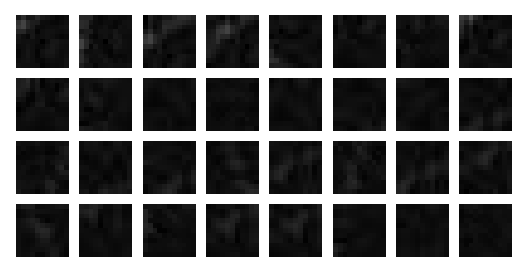

In [324]:
import numpy as np
import random


#rjkbxtcndj преобразований , выполняемых над изображением
transAmount = 6;
dlin   = 0

def load_CNN_train_augment(dir_name1):
    ll=[]           #пустой список имен входных файлов JPG 
    for file in os.listdir(dir_name1):
        if file.endswith(".jpg"): ll.append(file)
    dlin   = len(ll)     
    dlin0  = int(len(ll)/2)  #будем пропускать нечетные элементы
    #dlin=int(dlin0*(var+1) )  #0 ->просто чтение, 1 ->+90, 2 ->+180, 3 ->+270 дополняем массив
    train_x = np.zeros((dlin * transAmount, win_size, win_size, 3), dtype='float32')
    print('train_x_augm.shape=',train_x.shape)
    train_z = np.zeros((dlin * transAmount, 1), dtype='float32')
    dlin = dlin * transAmount
    k=0
    for file in ll:
        im  = Image.open(dir_name+"\\"+file)
        train_x[transAmount * k] = np.array(im.crop((3,3,3 + win_size, 3 +win_size)))*1./255.    
        train_x[transAmount * k + 1] = np.array(im.rotate(45).crop((3,3,3 + win_size,3 + win_size)))*1./255.    #print(b0.shape)
        shift0 = random.randint(0,6)
        shift1 = random.randint(0,6)
        shift2 = random.randint(0,6)
        shift3 = random.randint(0,6)
        #shift0 = 3
        #shift1 = 3
        #shift2 = 3
        #shift3 = 3
        if shift0 == 0 and shift1 == 0:
            shift0 += 2
        if shift2 == 0 or shift2 == 3:    
            shift2 +=1
        if shift3 == 0 or shift3 == 3:    
            shift3 +=1    
        train_x[transAmount * k + 2] = np.array(im.crop((shift0,0,shift0 + win_size,win_size)))*1./255.    #print(b0.shape)
        
        train_x[transAmount * k + 3] = np.array(im.crop((0,shift1,win_size,shift1 + win_size)))*1./255.    #print(b0.shape)
        train_x[transAmount * k + 4] = np.array(im.rotate(90).crop((shift2,shift3,shift2 + win_size,shift3 + win_size)))*1./255.
        train_x[transAmount * k + 5] = np.array(im.rotate(180).crop((3,3,3+win_size,3+win_size)))*1./255.
        #train_x[transAmount * k + 4] = np.array(im.crop((0,8,13,21)))*1./255.   
        train_z[k * transAmount] = int(labels[k])
        train_z[transAmount * k + 1] = int(labels[k])
        train_z[transAmount * k + 3] = int(labels[k])
        train_z[transAmount * k + 2] = int(labels[k])   
        train_z[transAmount * k + 4] = int(labels[k])  
        train_z[transAmount * k + 5] = int(labels[k])  
        k+=1
        if k==dlin: break
    temp=[]
    for i in range(len(train_z)):
        temp.append(to_categorical(train_z[i],num_classes=len(colors)))
    train_y=np.array(temp)    
    return train_x,train_y

train_x1,train_y1=load_CNN_train_augment(dir_name)
%matplotlib inline
def show_img_data(X_data,K0,rows,cols):   # смотрим на первые rows*cols 
    fig, axes = plt.subplots(rows, cols, figsize=(4, 2), dpi=160) #, figsize=(20, 6)) 
    for j in range(rows):
        for k in range(cols):
            axes[j,k].set_axis_off()
            axes[j,k].imshow(X_data[K0+j*cols+k].squeeze(), cmap='Greys', interpolation='None') #)'auto')

show_img_data(train_x1,0,4,8) 
#np.random.shuffle(train_x1)
#print('train_x_augm.shape=',train_x1.shape)

In [325]:
"""
from PIL import Image,ImageOps,ImageStat,ImageDraw\n",
    "import os,os.path\n",
    "import sys\n",
    "\n",
    "img_nam = \"D:/_SAR_Kubinka/new_mask_class_021.BMP\"\n",
    "im = Image.open(img_nam) \n",
    "obj = im.load()\n",
    "\n",
    "imWidth, imHeight = im.size\n",
    "\n",
    "for i in range(imWidth):\n",
    "    for j in range(imHeight):\n",
    "        print(obj[i , j])
"""

'\nfrom PIL import Image,ImageOps,ImageStat,ImageDraw\n",\n    "import os,os.path\n",\n    "import sys\n",\n    "\n",\n    "img_nam = "D:/_SAR_Kubinka/new_mask_class_021.BMP"\n",\n    "im = Image.open(img_nam) \n",\n    "obj = im.load()\n",\n    "\n",\n    "imWidth, imHeight = im.size\n",\n    "\n",\n    "for i in range(imWidth):\n",\n    "    for j in range(imHeight):\n",\n    "        print(obj[i , j])\n'

In [326]:
import random
amount_valid = 500
k = 0
idx_del = set()
train_x_valid = np.zeros((amount_valid, win_size, win_size, 3), dtype='float32')
train_y_valid = np.zeros((amount_valid,1,5), dtype='float32')
while k <amount_valid:
    idx =random.randint(0, train_x1.shape[0])
    while idx in idx_del:
        idx = random.randint(0, train_x1.shape[0])
    idx_del.add(idx)
    train_x_valid[k] = train_x1[idx]
    train_y_valid[k] = train_y1[idx]
    k += 1



idx_del = list(idx_del)
train_x_data = np.delete(train_x1, idx_del,0)
train_y_data = np.delete(train_y1, idx_del,0)

print('train_x_augm.shape=',train_y_valid.shape)
print('train_x_augm.shape=',train_x_data.shape)
#реорганизация набора тестовых данных, чтобы была равномерность 
train_x_valid_buf = np.zeros((train_x_data.shape[0]//2, win_size, win_size, 3), dtype='float32')
train_y_valid_buf = np.zeros((train_x_data.shape[0]//2,1,5), dtype='float32')

for i in range(train_x_data.shape[0]//2):
    if i%2 ==0:
        train_x_valid_buf[i] = train_x_data[2*i]
        train_y_valid_buf[i] = train_y_data[2*i]
np.flip( train_x_valid_buf)  
np.flip( train_y_valid_buf)  
for i in range(train_x_data.shape[0]//2):
    if i%2 ==0:
        train_x_data[2*i] = train_x_valid_buf[i]
        train_y_data[2*i] = train_y_valid_buf[i]

train_x_augm.shape= (500, 1, 5)
train_x_augm.shape= (13015, 11, 11, 3)


In [327]:
def train_CNN_model_ex(model_t,train_xt,train_yt,dlin_t,msize,step1,step2,val_split):
    model_temp=model_t
    val_acc_min=0.0
    for k in range(step1):
        #model_t.fit(train_xt,train_yt,epochs=step2,verbose=0,batch_size=16,validation_split=0.15)
        hist=model_t.fit(train_xt,train_yt.squeeze(),epochs=step2,verbose=0,validation_split=val_split)
        vvv=hist.history['val_accuracy']
        #vvv=hist.history['val_acc']
        print(k,vvv)
        val_acc=vvv[0]
        if val_acc> val_acc_min:
            model_temp=model_t
            val_acc_min=val_acc
            hist=model_t.fit(train_xt,train_yt.squeeze(),epochs=1,verbose=1,validation_split=val_split)
        
    #get_CNN_stat(train_xt,train_yt,dlin_t,model_t,msize)
    #get_CNN_stat(train_xz,train_yz,dlin_t,model_t,msize)
    print('end CNN train')
    return model_temp

In [328]:
from keras.models import Model # basic class for specifying and training a neural network
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Flatten
#from keras.preprocessing.image import ImageDataGenerator

from keras.utils import np_utils # utilities for one-hot encoding of ground truth values

num_train, height, width, depth = train_x_data.shape # there are 50000 training examples in CIFAR-10 
print(num_train, height, width, depth)

13015 11 11 3


In [329]:
def def_cnn_model(height,width,depth):
    batch_size = 8 # in each iteration, we consider 32 training examples at once
    num_epochs = 2 # we iterate 200 times over the entire training set
    kernel_size = 3 # we will use 3x3 kernels throughout
    pool_size = 2 # we will use 2x2 pooling throughout
    conv_depth_1 = height*2 # we will initially have 32 kernels per conv. layer...
    conv_depth_2 = height #64 # ...switching to 64 after the first pooling layer
    drop_prob_1 = 0.25 # dropout after pooling with probability 0.25
    drop_prob_2 = 0.5 # dropout in the FC layer with probability 0.5
    hidden_size = 78 # the FC layer will have 512 neurons
    num_classes=5

    inp = Input(shape=(height, width,depth)) # N.B. depth goes first in Keras!
# Conv [32] -> Conv [32] -> Pool (with dropout on the pooling layer)
    conv_1 = Convolution2D(conv_depth_1, kernel_size, kernel_size, border_mode='same', activation='relu')(inp)
    conv_2 = Convolution2D(conv_depth_1, kernel_size, kernel_size, border_mode='same', activation='relu')(conv_1)
    pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2)
    drop_1 = Dropout(drop_prob_1)(pool_1)
# Conv [64] -> Conv [64] -> Pool (with dropout on the pooling layer)
#    conv_3 = Convolution2D(conv_depth_2, kernel_size, kernel_size, border_mode='same', activation='relu')(conv_2)
#    conv_4 = Convolution2D(conv_depth_2, kernel_size, kernel_size, border_mode='same', activation='relu')(conv_3)
#    pool_2 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_4)
#drop_2 = Dropout(drop_prob_1)(pool_2)
# Now flatten to 1D, apply FC -> ReLU (with dropout) -> softmax
    flat = Flatten()(drop_1)
#    hidden = Dense(hidden_size, activation='relu')(flat)
#drop_3 = Dropout(drop_prob_2)(hidden)
    out = Dense(num_classes, activation='softmax')(flat)

    model = Model(input=inp, output=out) # To define a model, just specify its input and output layers
    model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer='adam', # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy
    return model

In [330]:
accuracy = np.zeros(len(colors), dtype='int')
all_elems = np.zeros(len(colors), dtype='int')
def estimateAccuracy(train_a,train_b,dlin_t,model_t):
     for k in range(dlin_t):
        ttt=np.zeros((1,win_size, win_size,3), dtype='float32')
        ttt[0]=train_a[k]
        z=model_t.predict(ttt)    #print(z)
        tx=train_b[k,0]
    
        ty=z; #z[0]
        m_idx = np.argmax(ty[0])  
        real_idx = np.argmax(tx)
        #print(m_idx, real_idx)
        #for j in range(len(ty[0])):
           # if ty[0,j] == m_value:
              #  ty[0,j] = 1
               # m_idx = j
            #else:
                #ty[0,j] = 0    
        #print(tx, ty)
        #print(type(tx))
        if  m_idx == real_idx:
            accuracy[real_idx]  += 1
            all_elems[real_idx] += 1
        else:
            all_elems[real_idx] += 1


In [331]:
model=def_cnn_model(height,width,depth)

C:\Users\anastasya\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(22, (3, 3), activation="relu", padding="same")`
  from ipykernel import kernelapp as app
C:\Users\anastasya\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(22, (3, 3), activation="relu", padding="same")`
  app.launch_new_instance()
C:\Users\anastasya\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [332]:
msize=16 
print(train_x_data.shape)
print(train_y_data.shape)
#print(sys.argc[0])
model=train_CNN_model_ex(model,train_x_data,train_y_data,dlin,msize, param1,1,0.1)

#estimateAccuracy(train_x_data, train_y_data, len(train_x_data), model)

(13015, 11, 11, 3)
(13015, 1, 5)
0 [0.21582181751728058]
Train on 11713 samples, validate on 1302 samples
Epoch 1/1
11713/11713 [==============================] - 4s 337us/step - loss: 0.8962 - accuracy: 0.6378 - val_loss: 1.0224 - val_accuracy: 0.4163
1 [0.7473118305206299]
Train on 11713 samples, validate on 1302 samples
Epoch 1/1
11713/11713 [==============================] - 4s 339us/step - loss: 0.8221 - accuracy: 0.6734 - val_loss: 0.7718 - val_accuracy: 0.6260
2 [0.7572964429855347]
Train on 11713 samples, validate on 1302 samples
Epoch 1/1
11713/11713 [==============================] - 4s 337us/step - loss: 0.7959 - accuracy: 0.6825 - val_loss: 0.7912 - val_accuracy: 0.6091
3 [0.5023041367530823]
4 [0.5122888088226318]
5 [0.638248860836029]
6 [0.4270353317260742]
7 [0.39400920271873474]
8 [0.5637480616569519]
9 [0.5161290168762207]
10 [0.6144393086433411]
11 [0.5913978219032288]
12 [0.418586790561676]
13 [0.45545315742492676]
14 [0.6228878498077393]
15 [0.7050691246986389]
16 [

In [333]:
estimateAccuracy(train_x_valid, train_y_valid, len(train_x_valid), model)
print(accuracy,all_elems )
p=[accuracy[i]/all_elems[i] for i in range(len(colors))]
print(p)
with open(acc_file, 'r+') as f:
    # ...
    f.seek(0, 2)       # перемещение курсора в конец файла
    f.write( " ".join(str(x) for x in p)) 
    f.close()    

[ 51  60  24  92 138] [ 60  84  45 103 208]
[0.85, 0.7142857142857143, 0.5333333333333333, 0.8932038834951457, 0.6634615384615384]


In [334]:
#print(x2y)

[(655, 901), (655, 944), (707, 944), (707, 901)]


In [335]:
temple_file = Image.open(img_file_name)
img = Image.new('RGB', temple_file.size, color=0)
x0 = 0
y0 = 0
draw  = ImageDraw.Draw(img)
width, height = img.size
im2=np.zeros((1, win_size, win_size, 3), dtype='float32')
class_marks = np.zeros((width,height), dtype='int')
for i in range(0, width,step_len -1):
    for j in range(0, height,step_len -1):
        if(i + win_size) < width and (j + win_size ) < height:
            x2y = [(i,j), (i + win_size, j),(i + win_size, j + win_size), (i, j + win_size)]
            im2[0] = np.array(  temple_file.crop((i, j, i + win_size,j + win_size)))*1./255.
            z = model.predict(im2)       
            m_idx = np.argmax(z[0])
            for k in range(win_size):
                for l in range(win_size):
                    class_marks[i + k, j + l] = m_idx + 1
            draw.polygon(x2y, outline = t_color[m_idx], fill = t_color[m_idx])

img.save(result_fileName)
img.close()

In [336]:
'''
temple_file = Image.open("D:/_SAR_Kubinka/accumulated.BMP")
img = Image.new('RGB', temple_file.size, color=0)
x0 = 0
y0 = 0
draw  = ImageDraw.Draw(img)
width, height = img.size
im2=np.zeros((1, win_size, win_size, 3), dtype='float32')
#class_marks = np.zeros((width,height), dtype='int')
for i in range(0, width,step_len -1):
    for j in range(0, height,step_len -1):
        if(i + win_size )< width and (j + win_size )< height:
            x2y = [(i,j), (i + win_size,j),(i + win_size,j +win_size), (i,j +win_size)]
            im2[0]=np.array(  temple_file.crop((i, j, i + win_size,j + win_size)) )*1./255.
            z=model.predict(im2)    #print(z)
       
            m_idx = np.argmax(z[0])
           # for k in range(win_size):
               # for l in range(win_size):
                    #class_marks[i + k, j+l]= m_idx + 1
            draw.polygon(x2y, outline = t_color[m_idx], fill = t_color[m_idx])

img.save("D:/_SAR_Kubinka/classification_result_accumulated.BMP")
img.close()
'''

'\ntemple_file = Image.open("D:/_SAR_Kubinka/accumulated.BMP")\nimg = Image.new(\'RGB\', temple_file.size, color=0)\nx0 = 0\ny0 = 0\ndraw  = ImageDraw.Draw(img)\nwidth, height = img.size\nim2=np.zeros((1, win_size, win_size, 3), dtype=\'float32\')\n#class_marks = np.zeros((width,height), dtype=\'int\')\nfor i in range(0, width,step_len -1):\n    for j in range(0, height,step_len -1):\n        if(i + win_size )< width and (j + win_size )< height:\n            x2y = [(i,j), (i + win_size,j),(i + win_size,j +win_size), (i,j +win_size)]\n            im2[0]=np.array(  temple_file.crop((i, j, i + win_size,j + win_size)) )*1./255.\n            z=model.predict(im2)    #print(z)\n       \n            m_idx = np.argmax(z[0])\n           # for k in range(win_size):\n               # for l in range(win_size):\n                    #class_marks[i + k, j+l]= m_idx + 1\n            draw.polygon(x2y, outline = t_color[m_idx], fill = t_color[m_idx])\n\nimg.save("D:/_SAR_Kubinka/classification_result_acc

In [337]:
'''
temple_file = Image.open("D:/_SAR_Kubinka/accumulated_1.BMP")
img = Image.new('RGB', temple_file.size, color=0)
x0 = 0
y0 = 0
draw  = ImageDraw.Draw(img)
width, height = img.size
im2=np.zeros((1, win_size, win_size, 3), dtype='float32')
#class_marks = np.zeros((width,height), dtype='int')
for i in range(0, width,step_len -1):
    for j in range(0, height,step_len -1):
        if(i + win_size )< width and (j + win_size )< height:
            x2y = [(i,j), (i + win_size,j),(i + win_size,j +win_size), (i,j +win_size)]
            im2[0]=np.array(  temple_file.crop((i, j, i + win_size,j + win_size)) )*1./255.
            z=model.predict(im2)    #print(z)
       
            m_idx = np.argmax(z[0])
           # for k in range(win_size):
               # for l in range(win_size):
                    #class_marks[i + k, j+l]= m_idx + 1
            draw.polygon(x2y, outline = t_color[m_idx], fill = t_color[m_idx])

img.save("D:/_SAR_Kubinka/classification_result_accumulated_1.BMP")
img.close()
'''

'\ntemple_file = Image.open("D:/_SAR_Kubinka/accumulated_1.BMP")\nimg = Image.new(\'RGB\', temple_file.size, color=0)\nx0 = 0\ny0 = 0\ndraw  = ImageDraw.Draw(img)\nwidth, height = img.size\nim2=np.zeros((1, win_size, win_size, 3), dtype=\'float32\')\n#class_marks = np.zeros((width,height), dtype=\'int\')\nfor i in range(0, width,step_len -1):\n    for j in range(0, height,step_len -1):\n        if(i + win_size )< width and (j + win_size )< height:\n            x2y = [(i,j), (i + win_size,j),(i + win_size,j +win_size), (i,j +win_size)]\n            im2[0]=np.array(  temple_file.crop((i, j, i + win_size,j + win_size)) )*1./255.\n            z=model.predict(im2)    #print(z)\n       \n            m_idx = np.argmax(z[0])\n           # for k in range(win_size):\n               # for l in range(win_size):\n                    #class_marks[i + k, j+l]= m_idx + 1\n            draw.polygon(x2y, outline = t_color[m_idx], fill = t_color[m_idx])\n\nimg.save("D:/_SAR_Kubinka/classification_result_a

In [338]:
'''
from PIL import ImageFilter
import numpy as np
picture = Image.open(img_file_name)
width, height = picture.size
width //= 2
height //= 2
img = Image.new('RGB', (width, height), color=0)
# Process every pixel
im2=np.zeros((1, 2, 2, 3), dtype='float32')
for i in range(width):
    for j in range(height):
        if(i + 2 )< width and (j + 2 )< height:
            #x2y = [(i,j), (i + win_size,j),(i + win_size,j +win_size), (i,j +win_size)]
            im2[0]=np.array(  picture.crop((2*i, 2*j, 2*i + 2,j*2 + 2)) )#*1./255.
            color = (im2[0][0,0] + im2[0][0,1]+ im2[0][1,1] + im2[0][1,0])//4
            #print(color)
            img.putpixel( (i,j), (color[0], color[1], color[2]))
img.save("D:/_SAR_Kubinka/accumulated.BMP")
img.close()      
'''

'\nfrom PIL import ImageFilter\nimport numpy as np\npicture = Image.open(img_file_name)\nwidth, height = picture.size\nwidth //= 2\nheight //= 2\nimg = Image.new(\'RGB\', (width, height), color=0)\n# Process every pixel\nim2=np.zeros((1, 2, 2, 3), dtype=\'float32\')\nfor i in range(width):\n    for j in range(height):\n        if(i + 2 )< width and (j + 2 )< height:\n            #x2y = [(i,j), (i + win_size,j),(i + win_size,j +win_size), (i,j +win_size)]\n            im2[0]=np.array(  picture.crop((2*i, 2*j, 2*i + 2,j*2 + 2)) )#*1./255.\n            color = (im2[0][0,0] + im2[0][0,1]+ im2[0][1,1] + im2[0][1,0])//4\n            #print(color)\n            img.putpixel( (i,j), (color[0], color[1], color[2]))\nimg.save("D:/_SAR_Kubinka/accumulated.BMP")\nimg.close()      \n'

In [339]:
'''
from PIL import ImageFilter
import numpy as np
picture = Image.open("D:/_SAR_Kubinka/accumulated.BMP")
width, height = picture.size
width //= 2
height //= 2
img = Image.new('RGB', (width, height), color=0)
# Process every pixel
im2=np.zeros((1, 2, 2, 3), dtype='float32')
for i in range(width):
    for j in range(height):
        if(i + 2 )< width and (j + 2 )< height:
            #x2y = [(i,j), (i + win_size,j),(i + win_size,j +win_size), (i,j +win_size)]
            im2[0]=np.array(  picture.crop((2*i, 2*j, 2*i + 2,j*2 + 2)) )#*1./255.
            color = (im2[0][0,0] + im2[0][0,1]+ im2[0][1,1] + im2[0][1,0])//4
            #print(color)
            img.putpixel( (i,j), (color[0], color[1], color[2]))
img.save("D:/_SAR_Kubinka/accumulated_1.BMP")
img.close()  
'''

'\nfrom PIL import ImageFilter\nimport numpy as np\npicture = Image.open("D:/_SAR_Kubinka/accumulated.BMP")\nwidth, height = picture.size\nwidth //= 2\nheight //= 2\nimg = Image.new(\'RGB\', (width, height), color=0)\n# Process every pixel\nim2=np.zeros((1, 2, 2, 3), dtype=\'float32\')\nfor i in range(width):\n    for j in range(height):\n        if(i + 2 )< width and (j + 2 )< height:\n            #x2y = [(i,j), (i + win_size,j),(i + win_size,j +win_size), (i,j +win_size)]\n            im2[0]=np.array(  picture.crop((2*i, 2*j, 2*i + 2,j*2 + 2)) )#*1./255.\n            color = (im2[0][0,0] + im2[0][0,1]+ im2[0][1,1] + im2[0][1,0])//4\n            #print(color)\n            img.putpixel( (i,j), (color[0], color[1], color[2]))\nimg.save("D:/_SAR_Kubinka/accumulated_1.BMP")\nimg.close()  \n'

In [340]:
with open(marks_filename, 'w') as file:
    for i in range(img_len):
        for j in range(img_len):
            file.write(str(class_marks[j, img_len-i] +1)) 
            file.write(" ") 
        file.write("\n")
    file.close()    

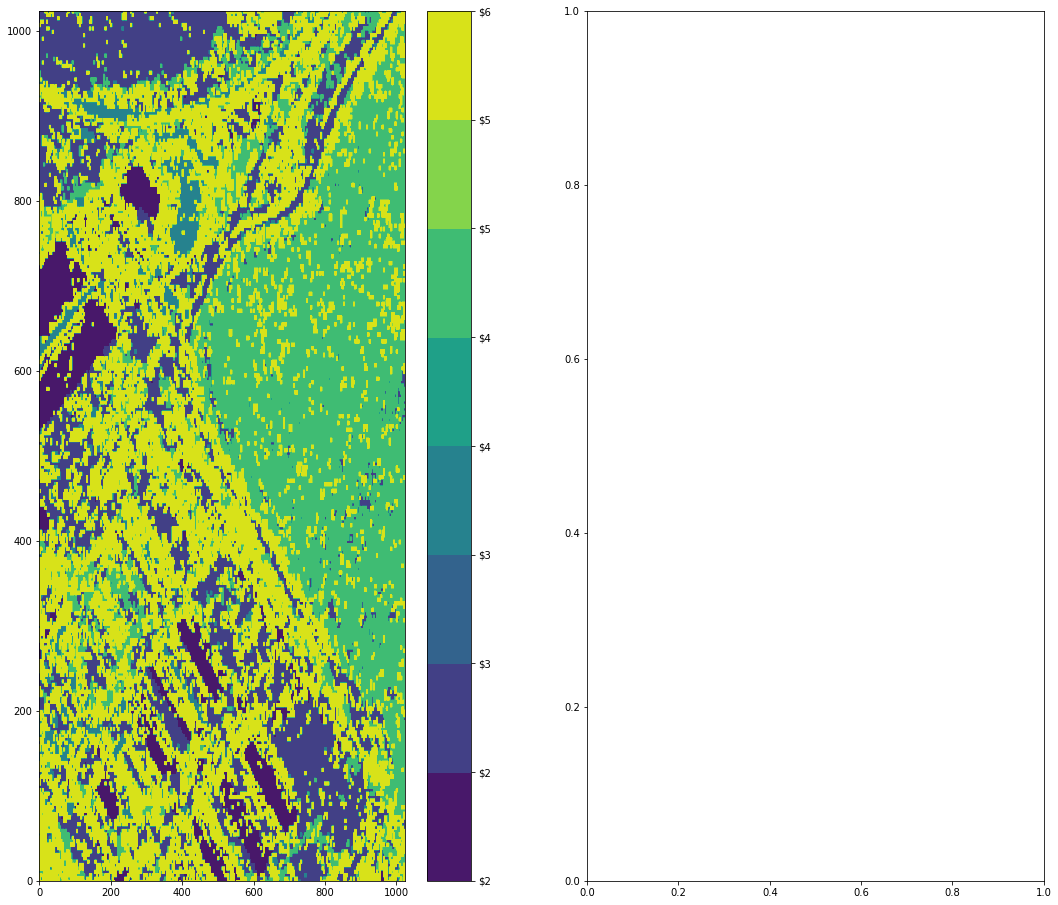

In [341]:
gridsize = (1, 2)
fig = plt.figure(figsize=(18, 16))
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (0, 1))
data = np.loadtxt(marks_filename)
pc = ax1.contourf(data)
plt.colorbar(pc, ax=ax1, format='$%d')
plt.show()

In [342]:
import os
os.startfile("C:/Users/anastasya/CMakeBuilds/71f94088-de5b-a431-82e1-cdd7ec577f63/build/x64-Debug (по умолчанию)/exec/exec.exe")